In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# allows the notebook to render graphics
%matplotlib inline
# a popular data visualization theme
plt.style.use('fivethirtyeight')

Some columns were removed from the stored csv due to github upload limitation. Therefore I have added a link to the resource file. In addition pd.read_csv can be used to pull data in from the site without the need to export any files.

In [2]:
# import first dataset to explore salaries in San Francisco
# https://data.sfgov.org/City-Management-and-Ethics/Employee-Compensation/88g8-5mnd
# salary_ranges = pd.read_json("https://data.sfgov.org/resource/88g8-5mnd.json")
salary_ranges = pd.read_csv("./data/Employee_Compensation.csv")



This section will cover the four levels of data:

* The nominal level
* The ordinal level
* The interval level
* The ratio level


# The nominal level

The nominal has the weakest structure. This data is purely described by name. *Blood type*: [A, O, AB], first and last names, and species of animals in a lab experiment are all examples of nominal. Althouh, we cannot perform math operations at the nominal, we can use pandas *value_counts* methods. We can also use graphs (e.g. bar charts, pie charts) because of our ability to count at the nominal level.

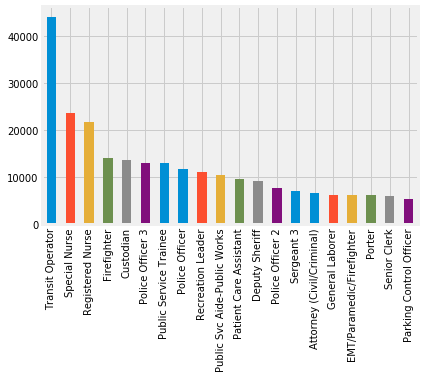

In [3]:
# Bar Chart of the Job column
salary_ranges.Job.value_counts().sort_values(ascending = False).head(20).plot(kind='bar')


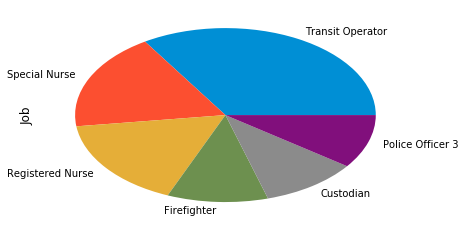

In [4]:
# Pie Chart of the Job column (top 6 values only)
salary_ranges['Job'].value_counts().sort_values(ascending = False).head(6).plot(kind='pie')


# The ordinal level

The ordinal level inherits all of the properties ofthe nominal level, but has inmportant additional properties. Ordinal level data can be naturally ordered. Some values in ordinal level columns can be considered better than or greater than others. Note, data at the ordinal level is categorical (even if numbers are used to represent the categories).

The ordinal level provides additional mathematical abilities. We can still do basic counts, but we can also do some comparisons, orderings, use new graphs, calculate medians, and percentiles. For example we can use a Likert scale (rating on a 1-10 scale). Bringing in a new dataset to work through this example on the ordinal scale; [2013 SFO Customer Survey](https://data.sfgov.org/Transportation/2013-SFO-Customer-Survey/mjr8-p6m5).

In [5]:
# load in the data set
# json export available via api
# https://data.sfgov.org/resource/mjr8-p6m5.json
customer = pd.read_csv('./data/2013_SFO_Customer_Survey.csv')


In [6]:
customer.shape

(3535, 95)

There are 95 columns in this dataset; [data dictionary](https://data.sfgov.org/api/views/mjr8-p6m5/files/FHnAUtMCD0C8CyLD3jqZ1-Xd1aap8L086KLWQ9SKZ_8?download=true&filename=AIR_DataDictionary_2013-SFO-Customer-Survey.pdf) available for this data dataset. Let's look at *Q7A_ART*. This column is about artwork and exhibitions. Here is the 0-6 scale associated with it:

0. Unacceptable
* Below Average
* Average
* Good
* Outstanding
* Have Never Used or Visited
* Blank

In [7]:
# look at all unique values in Q7A_ART column
customer['Q7A_ART'].sort_values().unique()

array([0, 1, 2, 3, 4, 5, 6])

In [8]:
art_ratings = customer['Q7A_ART']
art_ratings.describe()

count    3535.000000
mean        4.300707
std         1.341445
min         0.000000
25%         3.000000
50%         4.000000
75%         5.000000
max         6.000000
Name: Q7A_ART, dtype: float64

Pandas considers this column numerical because it contains numbers, but these numbers represent a category. Therefore, this data should be considered qualitative (i.e. ordinal).

In [9]:
# only consider ratings 1-5
art_ratings = art_ratings[(art_ratings >= 1) & (art_ratings <= 5)]

In [10]:
# cast the values as strings
art_ratings = art_ratings.astype(str)

art_ratings.describe()

count     2656
unique       5
top          4
freq      1066
Name: Q7A_ART, dtype: object

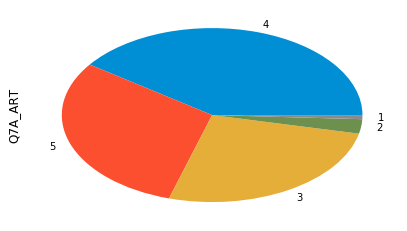

In [11]:
# use a pie chart just like I did earlier in nominal level
art_ratings.value_counts().plot(kind='pie')

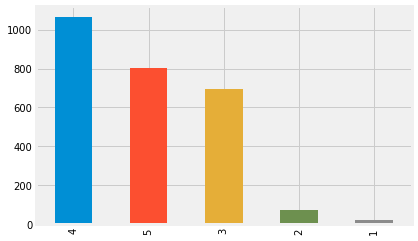

In [12]:
# visualize previous data as bar chart
art_ratings.value_counts().plot(kind='bar')

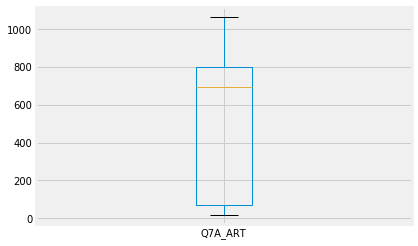

In [13]:
# can also use box plots with ordinal data
art_ratings.value_counts().plot(kind='box')

# The interval level

We are moving from qualitative to quantitative data at the interval level. Now we start to see interval level data has meaningful differences between values.  At this level we can begin adding and subtracting values. This ability to subtract and add values also intrduces two concepts:
* Arithmetic Mean (i.e mean)
* Standard Deviation 

Let's look at another data set for this section [Climate Change Data - GlobalLandTemperaturesByCity](https://www.kaggle.com/berkeleyearth/climate-change-earth-surface-temperature-data). Many records were removed from the following stored csv due to github upload limitation. The full dataset can be downloaded from the link above.

In [14]:
# load in data set
climate = pd.read_csv('./data/GlobalLandTemperaturesByCity.csv')
climate.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1743-11-01,10.013,2.291,Çorlu,Turkey,40.99N,27.69E
1,1743-12-01,NaN,NaN,Çorlu,Turkey,40.99N,27.69E
2,1744-01-01,NaN,NaN,Çorlu,Turkey,40.99N,27.69E
3,1744-02-01,NaN,NaN,Çorlu,Turkey,40.99N,27.69E
4,1744-03-01,NaN,NaN,Çorlu,Turkey,40.99N,27.69E


Each row quantifies the average temperature of cities by the month, tracing back to the 18th century. Note that the *.head()* fuction exposes missing values in the first 5 rows. Let's remove them.

In [15]:
# remove missing values
climate.dropna(axis=0, inplace=True)
climate.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1743-11-01,10.013,2.291,Çorlu,Turkey,40.99N,27.69E
5,1744-04-01,13.685,2.162,Çorlu,Turkey,40.99N,27.69E
6,1744-05-01,15.021,1.824,Çorlu,Turkey,40.99N,27.69E
7,1744-06-01,19.663,1.701,Çorlu,Turkey,40.99N,27.69E
8,1744-07-01,22.314,1.648,Çorlu,Turkey,40.99N,27.69E


Note rows with missing in the first 5 rows were removed, but let's see if there are any other missing values.

In [16]:
climate.isnull().sum()

dt                               0
AverageTemperature               0
AverageTemperatureUncertainty    0
City                             0
Country                          0
Latitude                         0
Longitude                        0
dtype: int64

There are no rows with missing data.

In [17]:
# show us the number of unique items
climate['AverageTemperature'].nunique()

43157

There are 32,588 unique values. Let's use a historgram to look at the average temperature in this dataset.

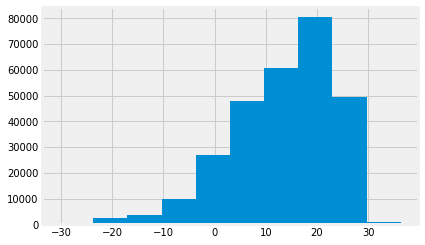

In [18]:
climate['AverageTemperature'].hist()

Here we can see we have an average value of approximately 10°. Let's confirm this.

In [19]:
climate['AverageTemperature'].describe()

count    282644.000000
mean         13.572389
std           9.987854
min         -30.347000
25%           6.903000
50%          15.343000
75%          21.507000
max          36.371000
Name: AverageTemperature, dtype: float64

Let's add new columns (e.g. *year*, *century*), and subset the data to only include temperatures recorded in the US.

In [20]:
# Convert the dt column to datetime and extract the year
climate['dt'] = pd.to_datetime(climate['dt'])
climate['year'] = climate['dt'].map(lambda value: value.year)

# A subset the data to just the US
climate_sub_us = climate.loc[climate['Country'] == 'United States'].copy()

#importing math.floor to get floor values
from math import floor
climate_sub_us['century'] = climate_sub_us['year'].map(lambda x: floor((x/100+1)))
# 1983 would become 20
# 1750 would become 18


In [21]:
climate_sub_us.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude,year,century
17393,1820-01-01,2.101,3.217,Abilene,United States,32.95N,100.53W,1820,19
17394,1820-02-01,6.926,2.853,Abilene,United States,32.95N,100.53W,1820,19
17395,1820-03-01,10.767,2.395,Abilene,United States,32.95N,100.53W,1820,19
17396,1820-04-01,17.989,2.202,Abilene,United States,32.95N,100.53W,1820,19
17397,1820-05-01,21.809,2.036,Abilene,United States,32.95N,100.53W,1820,19


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a18270dd8>,
      dtype=object)

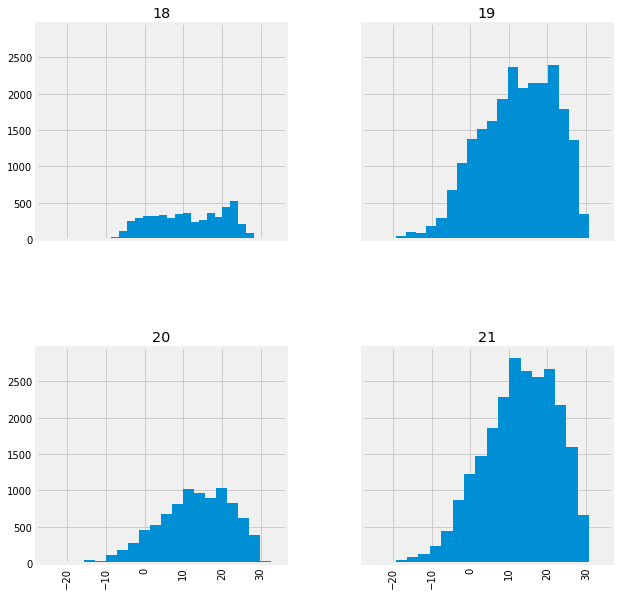

In [22]:
# plotting historgram for US by century
climate_sub_us['AverageTemperature'].hist(by=climate_sub_us['century'],
                                          sharex=True, sharey=True,
                                          figsize=(10,10),
                                          bins=20)

These four historgrams show *AverageTemperature* is rising slightly.

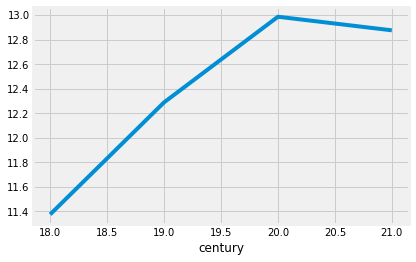

In [23]:
climate_sub_us.groupby('century')['AverageTemperature'].mean().plot(kind='line')

Now we can answer questions like how much, on average, the has the temperature risen since the 18th century in the US? These values of temperature changes over the centuries can be stored as its own pandas Series object.

In [24]:
century_changes = climate_sub_us.groupby('century')['AverageTemperature'].mean()

century_changes


century
18    11.375499
19    12.288699
20    12.986626
21    12.875906
Name: AverageTemperature, dtype: float64

To calculated a difference in temperatur, I can use the indicies in the Series to subtract the value in the 18th centruy from the value in the from the value in the 21st century.

In [25]:
# 21st century average temp in US minus 18th century average temp in US
avg_diff = century_changes[21] - century_changes[18]

# average difference in monthly recorded temperature in the US since the 18th century
avg_diff

1.500406781712467

We can plot two columns at the interval level, or higher, which opens us up to using scatter plots. Let's take a look at *year* and *averageTemperature* within the *climage_change* dataset.

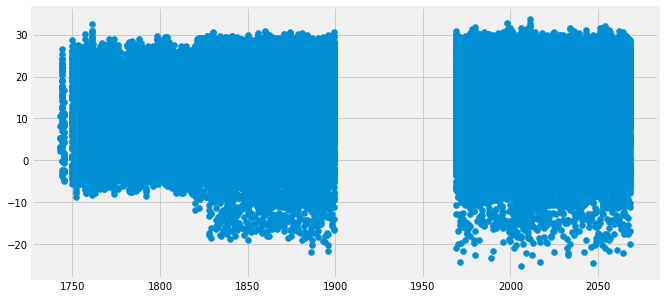

In [26]:
x = climate_sub_us['year']
y = climate_sub_us['AverageTemperature']
fig, ax = plt.subplots(figsize=(10,5))
ax.scatter(x,y)
plt.show()

Let's clean this up by using *groupby*.

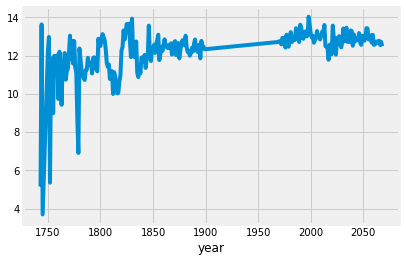

In [27]:
# Let's use a groupby to reduce the amount of noise in the US
climate_sub_us.groupby('year').mean()['AverageTemperature'].plot()


As we can see there is a large gap roughly between 1900 and 1970. Further investigation is needed to determine why there is such a large gap in the dataset.

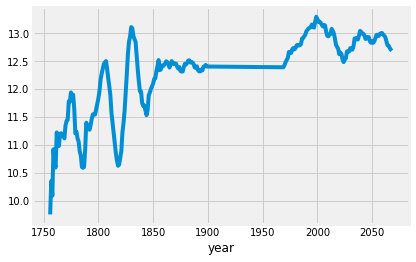

In [28]:
# Smoothing the visual by taking rolling mean over the years
climate_sub_us.groupby('year').mean()["AverageTemperature"].rolling(10).mean().plot()


Although we are missing a large chunck of data in the 1900's, we can see there seems to be a general trend upwards in average temperature across the US.

# The ratio level

At this level we are working with the highest degree of mathematics, as we are now able to multiply and divide quantitative values. This allows us to make unique observations that we would not be able to do at the lower levels. Let's go back to the salary data and look at the highest paid salaries.

In [29]:
salary_ranges.head(2)

,Year,Organization Group,Department Code,Union Code,Job,Employee Identifier,Salaries,Overtime,Other Salaries,Total Salary,Retirement,Health and Dental,Other Benefits,Total Benefits,Total Compensation
0,2028,Public Protection,CRT,792.0,Deputy Court Clerk II,8540990,674.28,0.0,5.76,680.04,130.91,0.0,53.86,184.77,864.81
1,2028,Public Protection,CRT,792.0,Deputy Court Clerk II,8540990,674.28,0.0,5.76,680.04,130.91,0.0,53.86,184.77,864.81


Text(0.5,1,'Top 20 Jobs by Mean Salary')

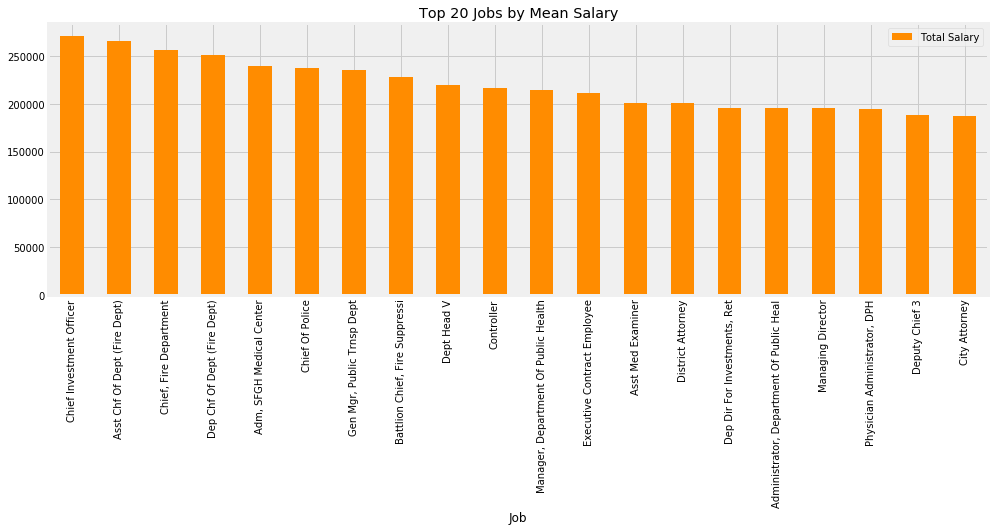

In [30]:
# Which Job has the highest average salary
fig = plt.figure(figsize=(15,5))
ax = fig.gca()

salary_ranges.groupby('Job')[['Total Salary']].mean().sort_values('Total Salary', ascending=False).head(20).plot.bar(stacked=False, ax=ax, color='darkorange')
ax.set_title('Top 20 Jobs by Mean Salary')


We can see that the Chief Investment Officer has the highest average salary. Let's take a look at the lowest-paid job.

Text(0.5,1,'Lowest 20 Jobs by Mean Salary')

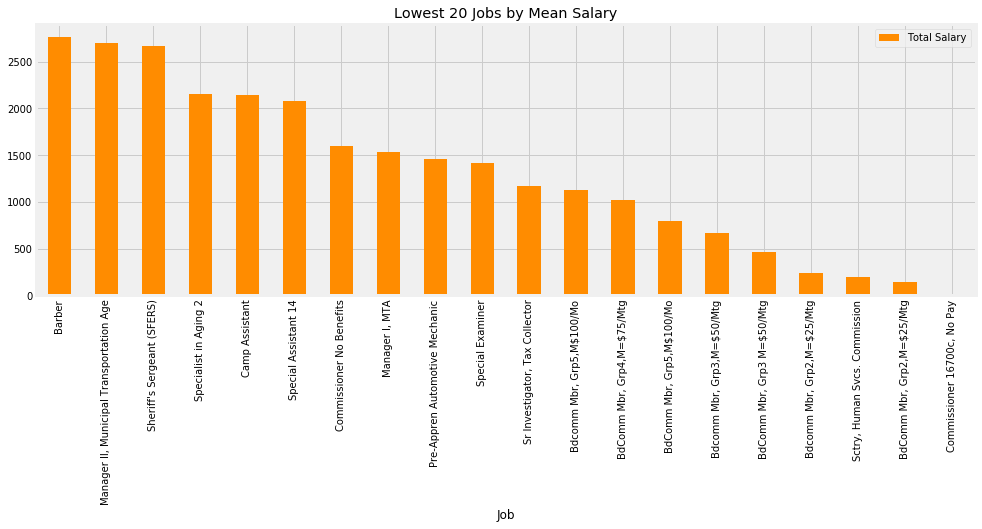

In [31]:
# Which Job has the highest average salary
fig = plt.figure(figsize=(15,5))
ax = fig.gca()

salary_ranges.groupby('Job')[['Total Salary']].mean().sort_values('Total Salary', ascending=False).tail(20).plot.bar(stacked=False, ax=ax, color='darkorange')
ax.set_title('Lowest 20 Jobs by Mean Salary')


We can see the lowest paid jobs sorted in descending order. Now let's find the ration of the highest-paid employee to the lowest paid employee.

In [32]:
# selecting the 5th lowest paid job, since lowest paid job is zero
sorted_df = salary_ranges.groupby("Job")[['Total Salary']].mean().sort_values('Total Salary', ascending=True)
sorted_df.iloc[-1][0] / sorted_df.iloc[4][0]


586.7389104931555

I chose the 5th lowest paid job, since lowest paid job is zero. We can see the highest-paid employee makes ≈600x the lowest city employee.